# Подготовка данных

# 1) Подключаем библиотеки

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Загружаем набор данных для обучения и тестирования модели**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [ ]:
x_train_org.shape

(60000, 28, 28)

**Вывод изображения из набора данных и проверка на соответствие в наборе y**

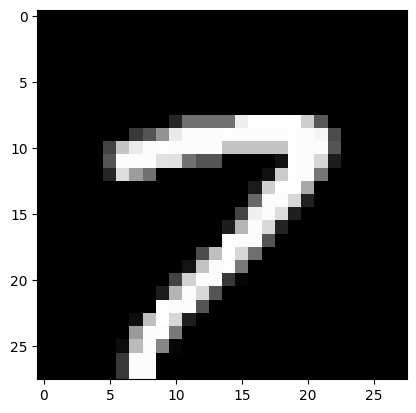

7


In [ ]:
n = 123

plt.imshow(x_train_org[n], cmap='gray')

plt.show()

print(y_train_org[123])

**Преобразование в вектор значений с помощью метода** `.reshape()`

In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

**Проверка изменений**

In [ ]:
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


**Приведение значения данных к одному виду**

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

**Приводим все метки классов к *one hot encoding***

In [ ]:
CLASS_COUNT = 10

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

print(y_train.shape)
print(y_train[122])

(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# 2) Обучение модели

**Создание модели и добавление слоев нейронов**

In [ ]:
model = Sequential()

model.add(Dense(800, input_dim=784, activation='relu'))

model.add(Dense(400, activation='relu'))

model.add(Dense(CLASS_COUNT, activation='softmax'))

**Запуск самообучения модели**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


**Отрисовываем схему нашей нейронной сети**

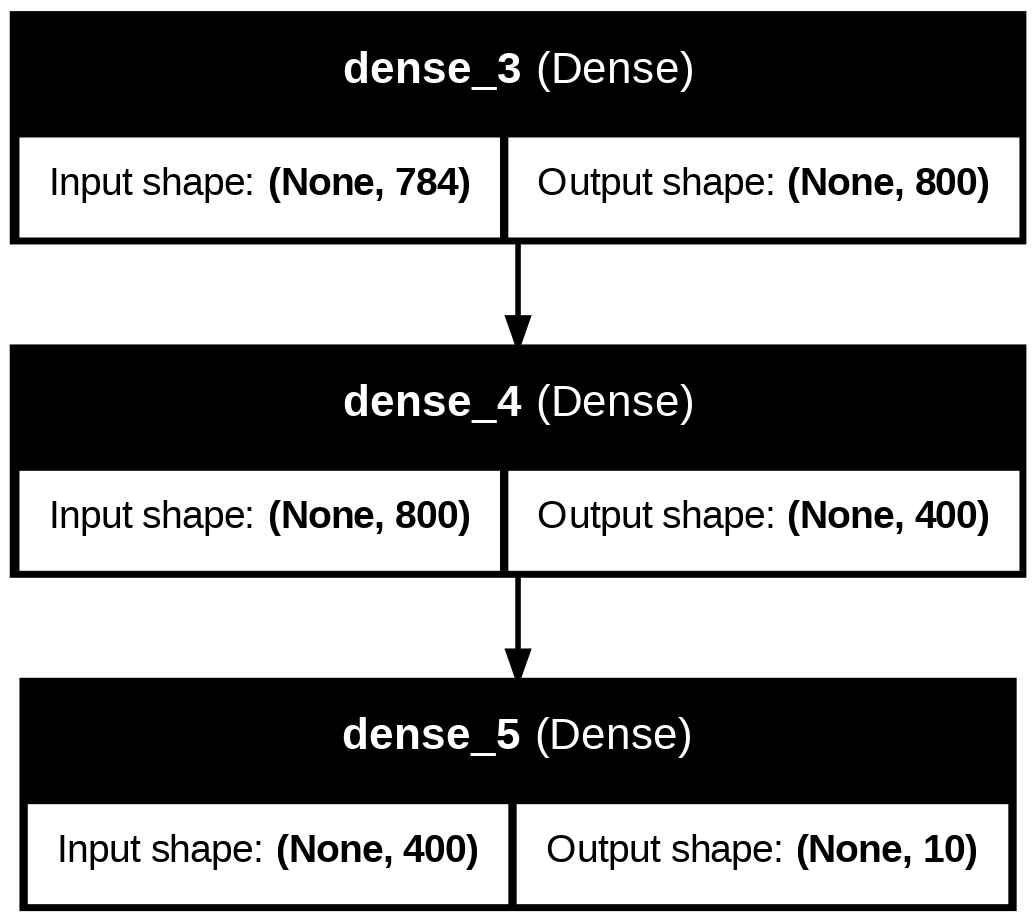

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Обучение нейронной сети**

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8873 - loss: 0.3770
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9767 - loss: 0.0762
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9851 - loss: 0.0450
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9900 - loss: 0.0307
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9934 - loss: 0.0214
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9941 - loss: 0.0183
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9938 - loss: 0.0183
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9947 - loss: 0.0152
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9968 - loss: 0.0096
Epoch 12/15
469/469 ━━━━━━━━━━━━

**Сохранение весов модели**

In [ ]:
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

**Проведем провеку работоспособности модели**

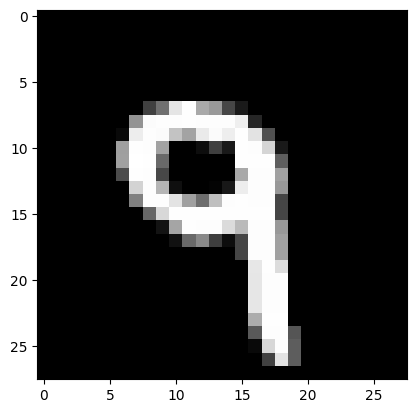

In [ ]:
n_rec = np.random.randint(x_test_org.shape[0])

plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [ ]:
test_number = x_test[n_rec]

print(test_number.shape)

(784,)


In [ ]:
test_number = np.expand_dims(test_number, axis=0)


print(test_number.shape)

(1, 784)


In [ ]:
prediction = model.predict(test_number)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[6.4274329e-13 4.2758822e-12 1.7106972e-11 2.8023510e-06 2.8249236e-09
  1.4690012e-10 3.1391687e-16 3.6387704e-04 2.9884339e-10 9.9963331e-01]]


In [ ]:
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 9


In [ ]:
print(y_test_org[n_rec])

9


Форма изображения: (28, 28)


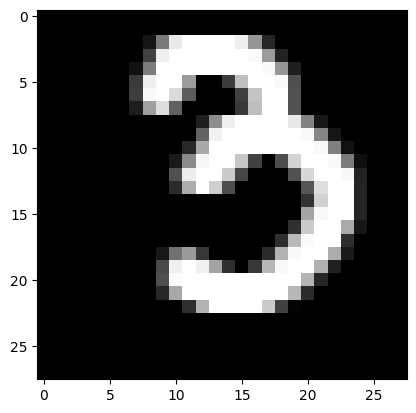

In [ ]:
from PIL import Image

# Загрузка изображения
img = Image.open('image.png')

# Преобразование изображения в массив numpy
img_array = np.array(img)

# Проверим форму изображения Ожидаем (28, 28)
print(f'Форма изображения: {img_array.shape}')  #

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Нормализация значений пикселей (от 0 до 1)
img_array = img_array.astype('float32') / 255.

# Преобразование в нужную форму (1, 784)
img_array = img_array.reshape(1, 784)

# Теперь можно сделать прогноз
prediction = model.predict(img_array)

# Вывод предсказания
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Распознана цифра: 3
